# **1. 전복 데이터를 가지고 머신러닝 5가지 분류를 수행 (SVM, LR, RF, DT, KNN)**

In [89]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [91]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_csv("C:/Users/Yujin/Desktop/3-2/Deep-learning-application/dataset/abalone.csv")

In [93]:
# 데이터프레임 출력
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [95]:
# Sex를 라벨인코딩해줌
print("Original value counts:")
print(df['Sex'].value_counts())

Original value counts:
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [97]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [99]:
# M: 2, I: 1, F: 0
print("\nLabel encoded data:")
print(df)


Label encoded data:
        id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0    2   0.455     0.365   0.095        0.5140          0.2245   
1        1    2   0.350     0.265   0.090        0.2255          0.0995   
2        2    0   0.530     0.420   0.135        0.6770          0.2565   
3        3    2   0.440     0.365   0.125        0.5160          0.2155   
4        4    1   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ...     ...       ...     ...           ...             ...   
4172  4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173  4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174  4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175  4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176  4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500

In [101]:
print("Value counts after label encoding:")
print(df['Sex'].value_counts())

Value counts after label encoding:
Sex
2    1528
1    1342
0    1307
Name: count, dtype: int64


In [103]:
# "https://github.com/prudhvinathreddymalla/Abalone-Dataset/blob/master/Abalone.ipynb"를 참고해서
# Rings에 1.5를 더하면 age가 된다는 사실을 알고 이를 사용함

df['age'] = df.Rings + 1.5
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,age
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [105]:
AgeValues = df['age'].values
AgeIndex = []

for age in AgeValues:
    if age < 8:
        AgeIndex.append('0')  # 젊은 경우
    else:
        AgeIndex.append('1')  # 늙은 경우

AgeIndex = pd.DataFrame(data=AgeIndex, columns=['AgeIndex'])
df['AgeIndex'] = AgeIndex['AgeIndex']

print(df.head())

   id  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0    2   0.455     0.365   0.095        0.5140          0.2245   
1   1    2   0.350     0.265   0.090        0.2255          0.0995   
2   2    0   0.530     0.420   0.135        0.6770          0.2565   
3   3    2   0.440     0.365   0.125        0.5160          0.2155   
4   4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings   age AgeIndex  
0          0.1010         0.150     15  16.5        1  
1          0.0485         0.070      7   8.5        1  
2          0.1415         0.210      9  10.5        1  
3          0.1140         0.155     10  11.5        1  
4          0.0395         0.055      7   8.5        1  


In [107]:
df = df.drop('id',axis=1)

In [109]:
df = df.drop('Rings',axis=1)

In [111]:
df = df.drop('age',axis=1)

In [113]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [115]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'AgeIndex'],
      dtype='object')

Text(0.5, 1.0, 'AgeIndex')

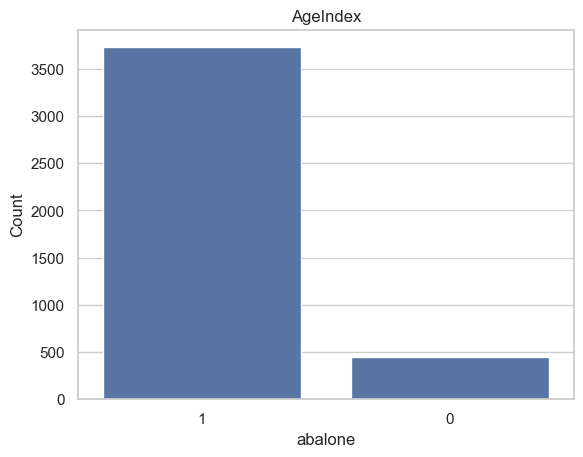

In [117]:
# 결과 개수 확인 (그래프)
sns.countplot(data = df, x="AgeIndex")
plt.xlabel("abalone")
plt.ylabel("Count")
plt.title("AgeIndex")

In [118]:
# 결과 개수 확인 (숫자)
df['AgeIndex'].value_counts()

AgeIndex
1    3729
0     448
Name: count, dtype: int64

In [119]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
AgeIndex          0
dtype: int64

In [120]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
AgeIndex          0
dtype: int64

In [122]:
# 데이터프레임 출력
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


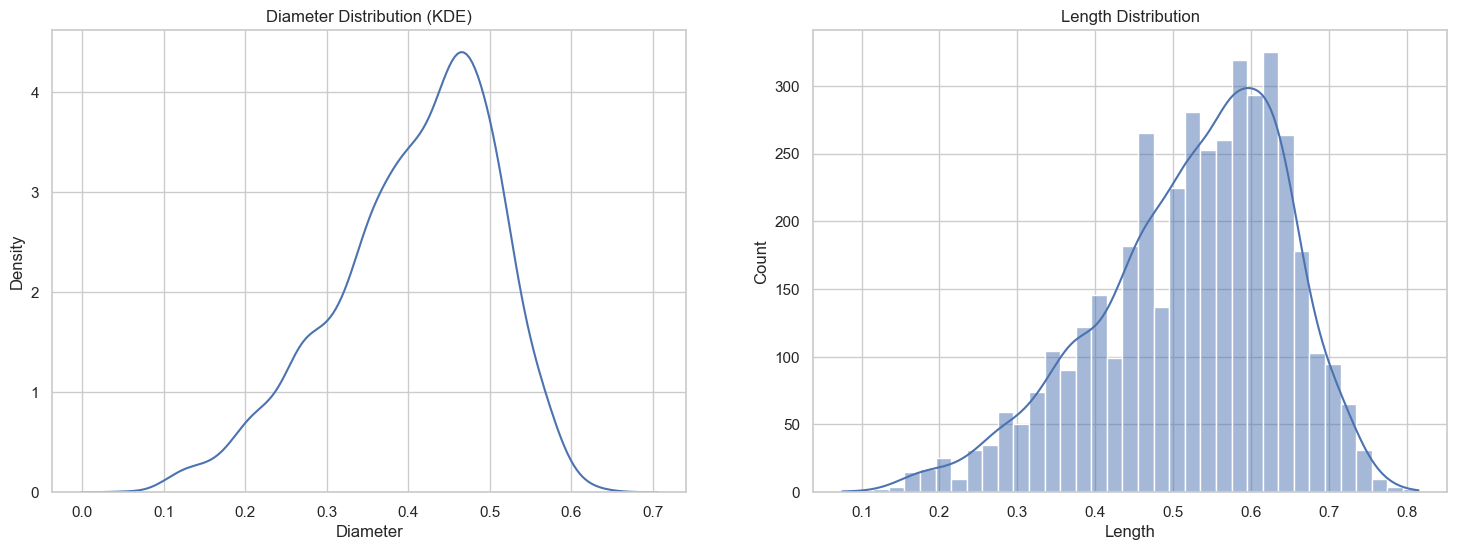

In [126]:
# 컬럼별 히스토그램 확인
# 'Diameter'와'Length' 칼럼을 선택
figure = plt.figure(figsize=(18, 6))

# 'Diameter'의 KDE만 표시
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(df['Diameter'], ax=ax1)
ax1.set_title('Diameter Distribution (KDE)')

# 'Length'의 히스토그램과 KDE 표시
ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['Length'], kde=True, ax=ax2)
ax2.set_title('Length Distribution')

plt.show()

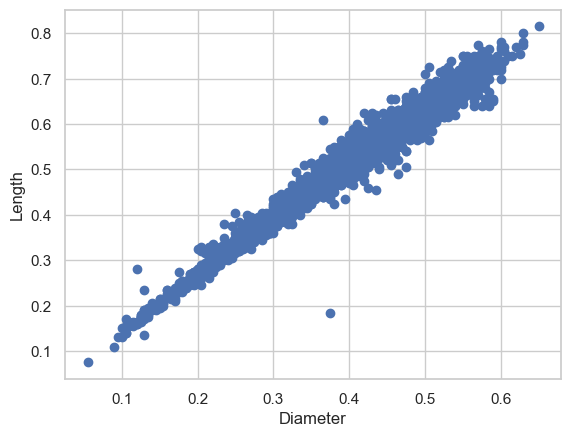

In [128]:
# 산점도 확인
plt.scatter(df['Diameter'], df['Length'])
plt.xlabel('Diameter')
plt.ylabel('Length')

plt.show()

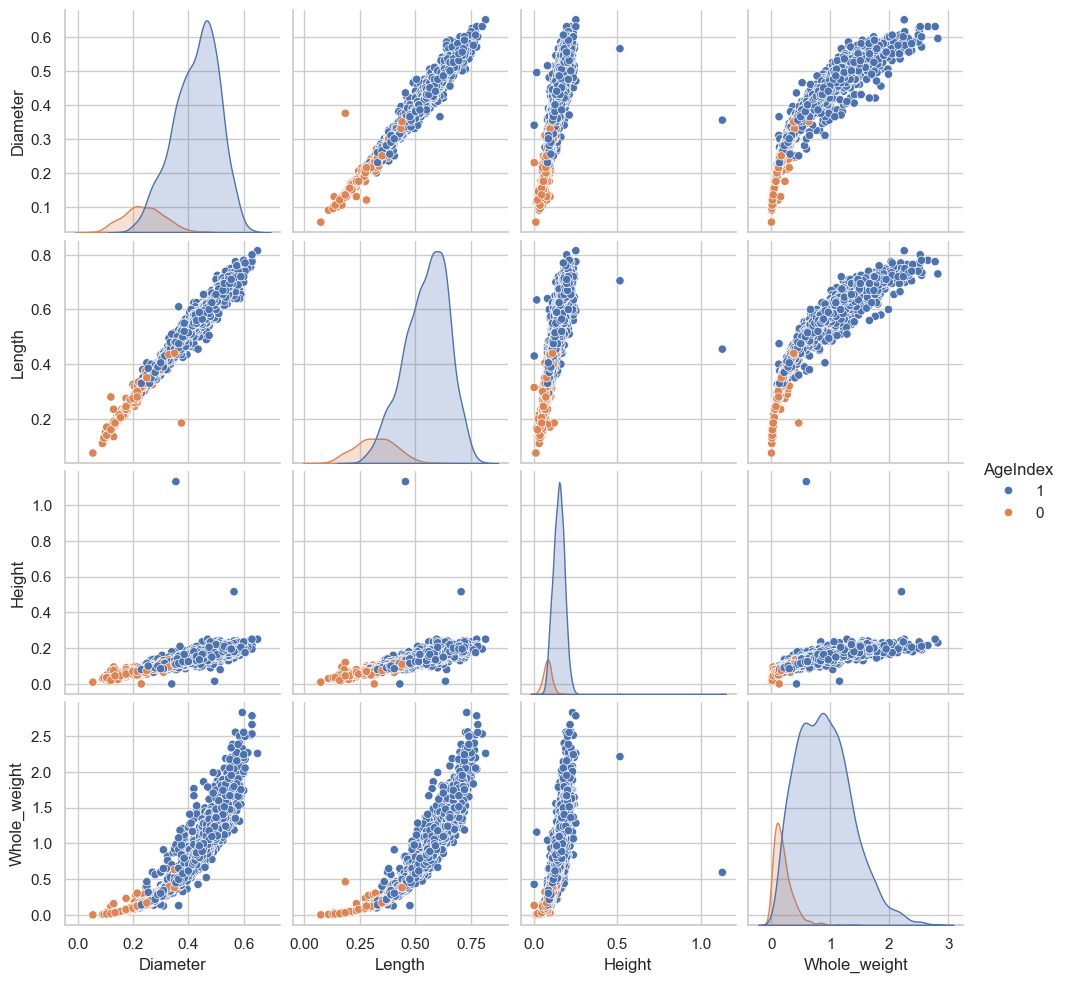

In [129]:
# pairplot를 사용해 각 상관관계 살펴보기
sns.pairplot(df,
             vars=['Diameter', 'Length', 'Height', 'Whole_weight'],
            hue ='AgeIndex')
plt.show()

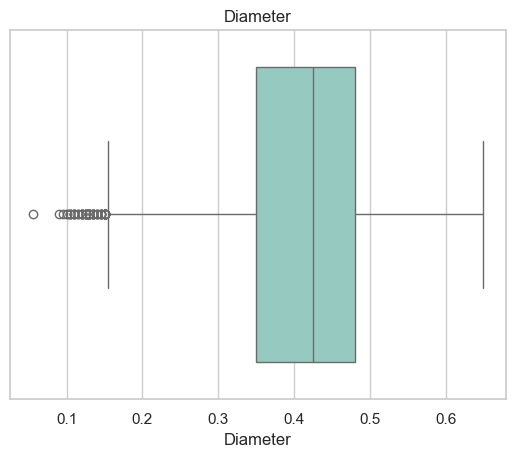

In [130]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="Diameter", data=df, palette="Set3")
plt.title("Diameter")
plt.show()

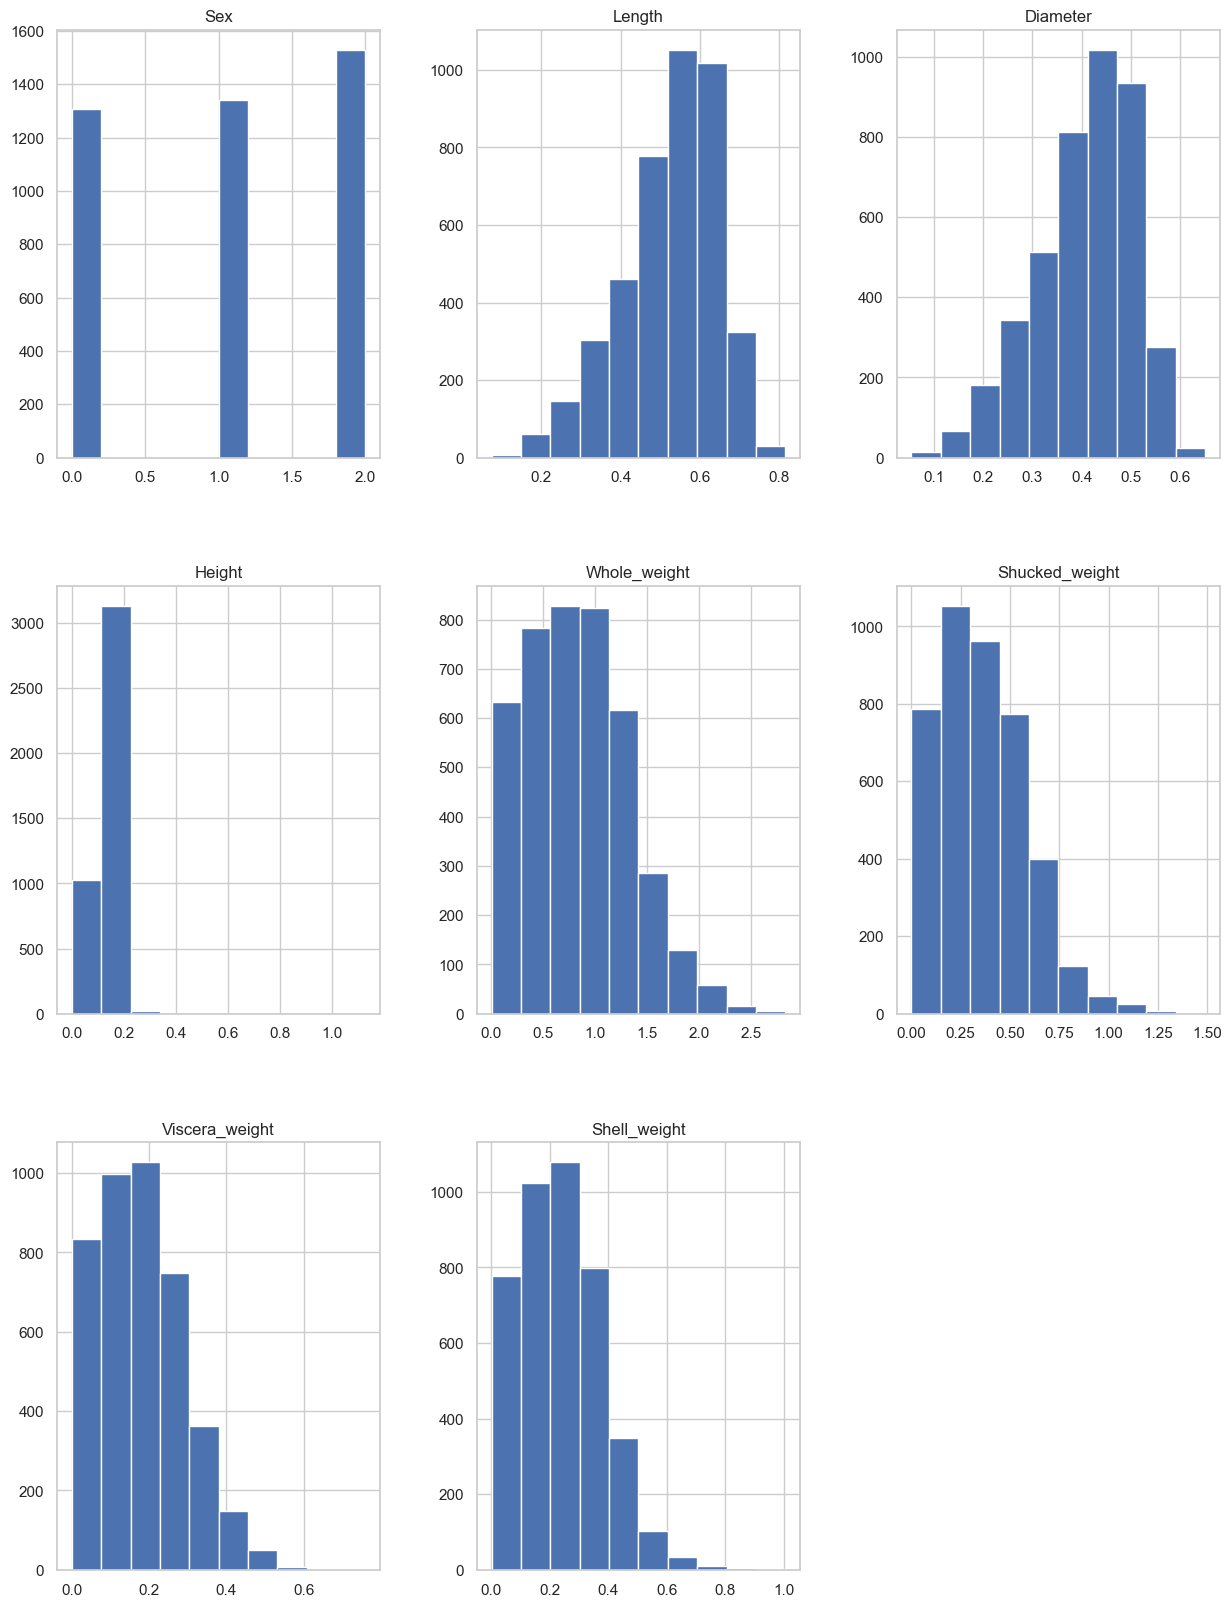

In [131]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [132]:
# AgeIndex 열을 제거, head() 메서드를 사용해 처음 5행을 출력
X=df.drop('AgeIndex',axis=1)
X.head() 

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [133]:
# 데이터프레임 출력
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,AgeIndex
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,1
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,1
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1


In [134]:
# AgeIndex 변수의 클래스 개수를 확인
y=df['AgeIndex']
y.value_counts()

AgeIndex
1    3729
0     448
Name: count, dtype: int64

In [135]:
# 전체 데이터의 25%를 테스트 세트로 사용, 75%는 훈련 세트로 사용
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [137]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델: 이진 분류 문제
from sklearn.svm import SVC # Support Vector Machine 모델
from sklearn.neural_network import MLPClassifier # 다층 퍼셉트론 분류기
from sklearn.tree import DecisionTreeClassifier # 결정 트리 분류기
from sklearn.metrics import accuracy_score # 정확도 계산, 모델 성능 평가
from sklearn.metrics import confusion_matrix # 혼동 행렬을 계산, 분류 모델의 성능을 자세히 분석

## **1. SVM**

In [139]:
clf_svm = SVC(random_state=0) # SVM 분류기 객체 생성
clf_svm.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 SVM 모델을 학습

pred_svm = clf_svm.predict(X_test) # 학습된 SVM 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print("--- SVM Classifier ---")
print("정확도:", accuracy_score(y_test, pred_svm)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_svm 간의 정확도를 출력
print("혼동 행렬:\n", confusion_matrix(y_test, pred_svm)) # 혼동 행렬을 계산하고 출력

--- SVM Classifier ---
정확도: 0.9311004784688995
혼동 행렬:
 [[ 69  54]
 [ 18 904]]


## **2. LR**

In [142]:
clf_lr = LogisticRegression(random_state=0) # LR 분류기 객체 생성
clf_lr.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 LR 모델을 학습

pred_lr = clf_lr.predict(X_test) # 학습된 LR 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Logistic Regression Classifier ---")
print ("정확도:", accuracy_score(y_test, pred_lr)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_lr 간의 정확도를 출력
print ("혼동 행렬:\n", confusion_matrix(y_test, pred_lr)) # 혼동 행렬을 계산하고 출력

--- Logistic Regression Classifier ---
정확도: 0.9368421052631579
혼동 행렬:
 [[ 72  51]
 [ 15 907]]


## **3. RF**

In [144]:
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier를 사용하기 위해 클래스를 임포트
from sklearn.metrics import accuracy_score # 정확도 계산
# 경고 메시지를 무시
import warnings
warnings.filterwarnings('ignore')

clf_rf = RandomForestClassifier(random_state=0) # RF 분류기 객체 생성
clf_rf.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 RF 모델을 학습

pred_rf = clf_rf.predict(X_test) # 학습된 RF 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Radom Forest ---")
print("정확도:", accuracy_score(y_test,pred_rf)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_rf 간의 정확도를 출력
print (confusion_matrix(y_test, pred_rf)) # 혼동 행렬을 계산하고 출력

--- Radom Forest ---
정확도: 0.9349282296650717
[[ 79  44]
 [ 24 898]]


## **4. DT**

In [146]:
clf_dt = DecisionTreeClassifier(random_state=0) # DT 분류기 객체 생성
clf_dt.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 DT 모델을 학습

pred_dt = clf_dt.predict(X_test) # 학습된 DT 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print ("--- Decision Tree Classifier ---")
print ("정확도:", accuracy_score(y_test, pred_dt)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_dt 간의 정확도를 출력
print ("혼동 행렬:\n", confusion_matrix(y_test, pred_dt)) # 혼동 행렬을 계산하고 출력
     

--- Decision Tree Classifier ---
정확도: 0.9100478468899521
혼동 행렬:
 [[ 73  50]
 [ 44 878]]


## **5. KNN**

In [148]:
# KNN 분류기 초기화
knn = KNeighborsClassifier(n_neighbors=5) # KNN 분류기 객체 생성
knn.fit(X_train, y_train) # 훈련 데이터 X_train과 타겟 데이터 y_train을 사용하여 KNN 모델을 학습

pred_knn = knn.predict(X_test) # 학습된 KNN 모델을 사용하여 테스트 데이터 X_test에 대한 예측을 수행, 결과를 저장

print("--- K-Nearest Neighbors ---")
print("정확도:", accuracy_score(y_test, pred_knn)) # 테스트 데이터의 실제 값 y_test와 예측 값 pred_knn 간의 정확도를 출력
print("혼동 행렬:\n", confusion_matrix(y_test, pred_knn)) # 혼동 행렬을 계산하고 출력

--- K-Nearest Neighbors ---
정확도: 0.9263157894736842
혼동 행렬:
 [[ 75  48]
 [ 29 893]]
